In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy import linalg
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import neighbors
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Lets load all the simulated data files
df_file = []
test_names = ['Concentric Circles','Linearly Seperable','Outliers','Ushape','XOR']
file_names = ['concertriccir2.csv','linearsep.csv','outlier.csv','ushape.csv','xor.csv']
for files in file_names:
    df_file.append(pd.read_csv(files))

Concentric Circles


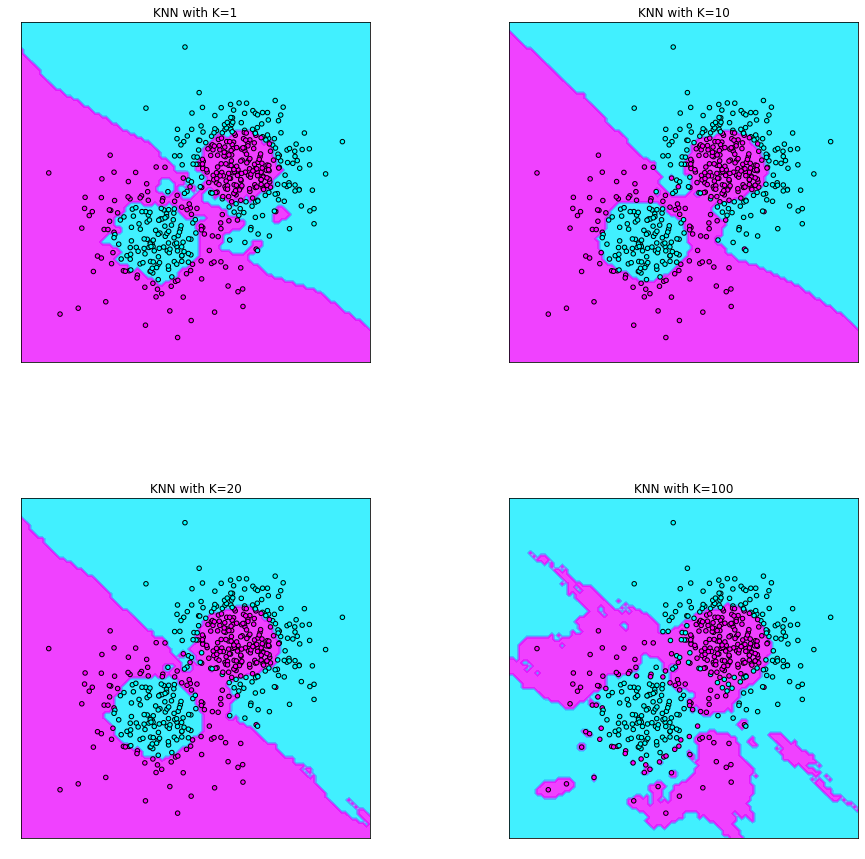

Linearly Seperable


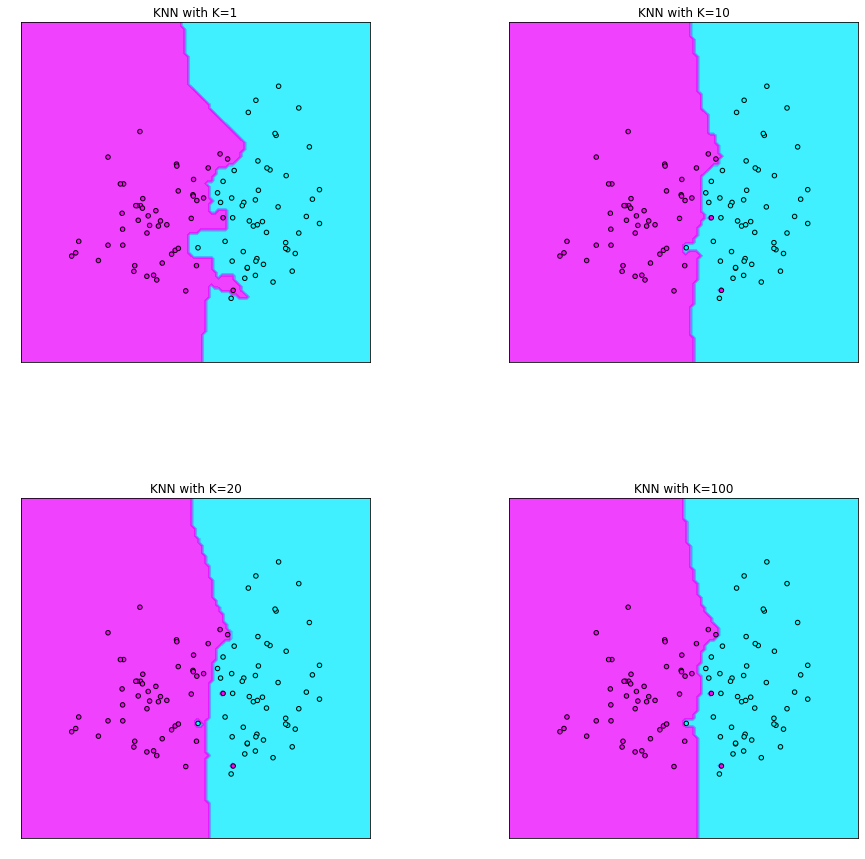

Outliers


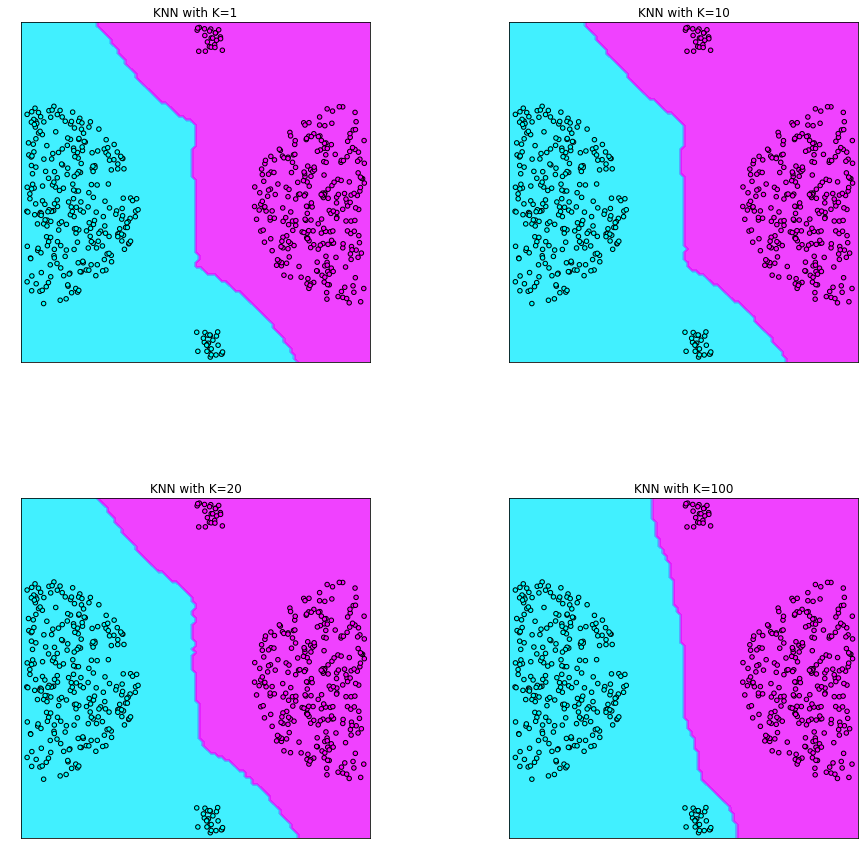

Ushape


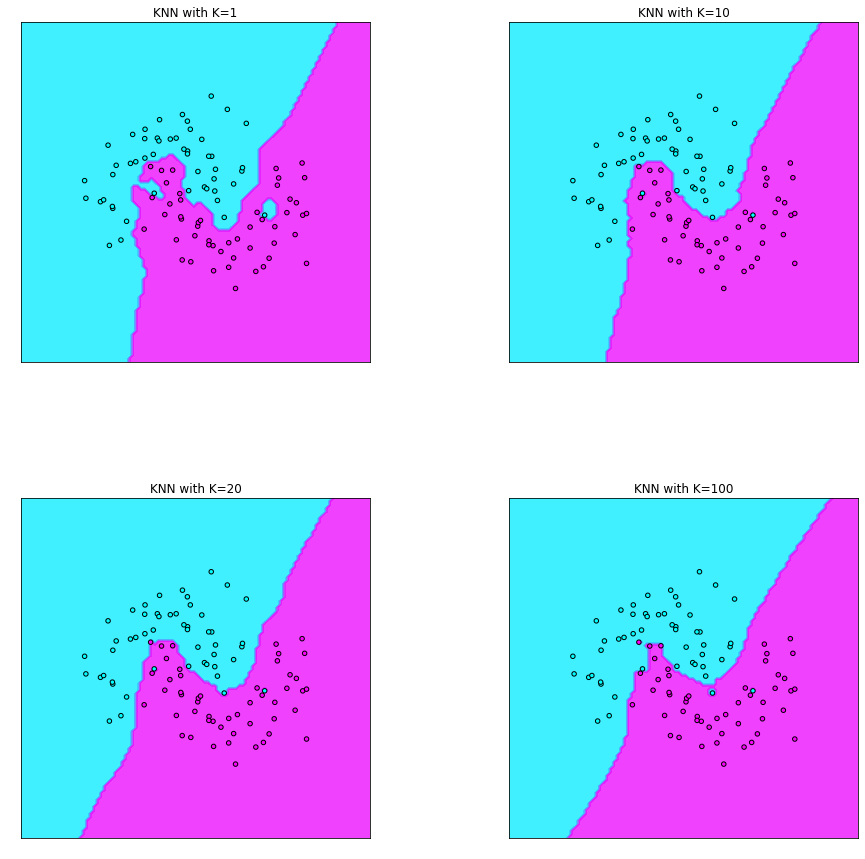

XOR


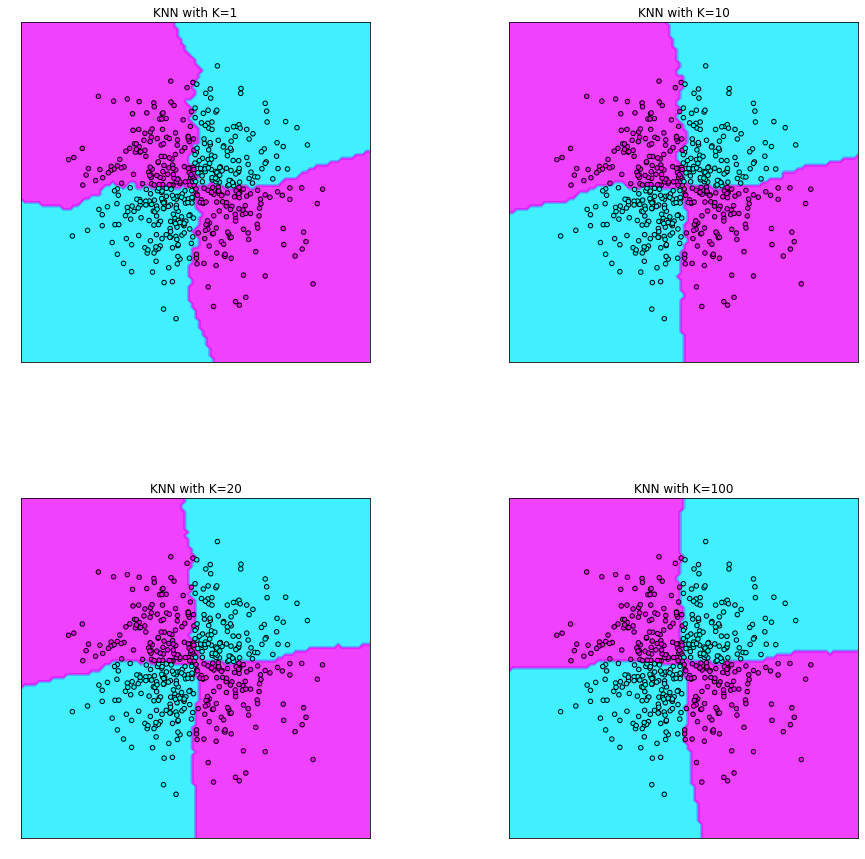

In [3]:
for i, files in enumerate(test_names):
    print(files)
    
    # Take the simulated features and class
    X = df_file[i][['X','Y']].values
    y = df_file[i]['class'].astype(int).values

    models = (
    #Using eucledian distance
    #Brute indicates distances from each query feature vector to each feature vector in the training data set.
    neighbors.KNeighborsClassifier(1,weights='distance',algorithm='brute',metric='minkowski'),
    neighbors.KNeighborsClassifier(10,weights='distance',algorithm='brute',metric='minkowski'),
    neighbors.KNeighborsClassifier(20,weights='distance',algorithm='brute',metric='minkowski'),
    neighbors.KNeighborsClassifier(100,weights='distance',algorithm='brute',metric='minkowski'),
    )
    models_fits = (clf.fit(X, y) for clf in models)
    # title for the plots
    titles = (
        "KNN with K=1",
        "KNN with K=10",
        "KNN with K=20",
        "KNN with K=100",
    )

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.title(files,fontsize=14,fontweight='bold')
    X0, X1 = X[:, 0], X[:, 1]

    for clf, title, ax in zip(models_fits, titles, sub.flatten()):
        disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            response_method="predict",
            cmap=plt.cm.cool,
            alpha=0.8,
            ax=ax,
            xlabel=" ",
            ylabel=" ",
        )
        ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
    plt.show()

### Basic Hyperparameter tuning example

In [35]:
for i, files in enumerate(test_names):
    print(files,":\n")
    # Take the simulated features and class
    X = df_file[i][['X','Y']].values
    y = df_file[i]['class'].astype(int).values
    acc_df_train = pd.DataFrame(columns=['K=1','K=20','K=60','K=80'])
    acc_df_test = pd.DataFrame(columns=['K=1','K=20','K=60','K=80'])
    models_used = (
        #Using eucledian distance
        neighbors.KNeighborsClassifier(1,weights='distance',algorithm='brute',metric='minkowski'),
        neighbors.KNeighborsClassifier(20,weights='distance',algorithm='brute',metric='minkowski'),
        neighbors.KNeighborsClassifier(60,weights='distance',algorithm='brute',metric='minkowski'),
        neighbors.KNeighborsClassifier(80,weights='distance',algorithm='brute',metric='minkowski'),
        )
    #run loop for 100 iterations
    for i in range(1,101):
        acc_score_train = []
        acc_score_test = []
        #Train and test Splits
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y)
        #Model Training
        models_fits = (clf.fit(X_train, y_train) for clf in models_used)        
        #Calculating Training and Testing Scores
        for fits in models_fits:
            acc_score_train.append(accuracy_score(y_train, fits.predict(X_train)))
            acc_score_test.append(accuracy_score(y_test, fits.predict(X_test)))
            
        acc_df_train.loc[len(acc_df_train.index)] = acc_score_train
        acc_df_test.loc[len(acc_df_test.index)] = acc_score_test
    
    print("Training Accuracy :")
    print(acc_df_train.mean(axis=0)) 
    print("Testing Accuracy :")
    print(acc_df_test.mean(axis=0))  
    print("\n")
        
    

Concentric Circles :

Training Accuracy :
K=1     1.0
K=20    1.0
K=60    1.0
K=80    1.0
dtype: float64
Testing Accuracy :
K=1     0.8970
K=20    0.8774
K=60    0.8114
K=80    0.7725
dtype: float64


Linearly Seperable :

Training Accuracy :
K=1     1.0
K=20    1.0
K=60    1.0
K=80    1.0
dtype: float64
Testing Accuracy :
K=1     0.9325
K=20    0.9545
K=60    0.9530
K=80    0.9565
dtype: float64


Outliers :

Training Accuracy :
K=1     1.0
K=20    1.0
K=60    1.0
K=80    1.0
dtype: float64
Testing Accuracy :
K=1     1.0
K=20    1.0
K=60    1.0
K=80    1.0
dtype: float64


Ushape :

Training Accuracy :
K=1     1.0
K=20    1.0
K=60    1.0
K=80    1.0
dtype: float64
Testing Accuracy :
K=1     0.9130
K=20    0.9040
K=60    0.8795
K=80    0.8925
dtype: float64


XOR :

Training Accuracy :
K=1     1.0
K=20    1.0
K=60    1.0
K=80    1.0
dtype: float64
Testing Accuracy :
K=1     0.9579
K=20    0.9762
K=60    0.9733
K=80    0.9707
dtype: float64




In [5]:
# reading the excel file
df = pd.read_excel('Banknote_Dataset.xlsx')
#print first 5 rows 
df.head()

,var,skew,kurt,ent,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df

,var,skew,kurt,ent,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [12]:
selcted_features=['kurt','ent','class']
df2=df[selcted_features]

In [31]:
def dataset():
    """Generate data from dataset"""
    X=df2[selcted_features[:-1]].to_numpy()
    y=df2['class'].to_numpy()
    return X, y

X,y = dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)

Training Accuracy :  1.0
Testing Accuracy :  0.7122040072859745


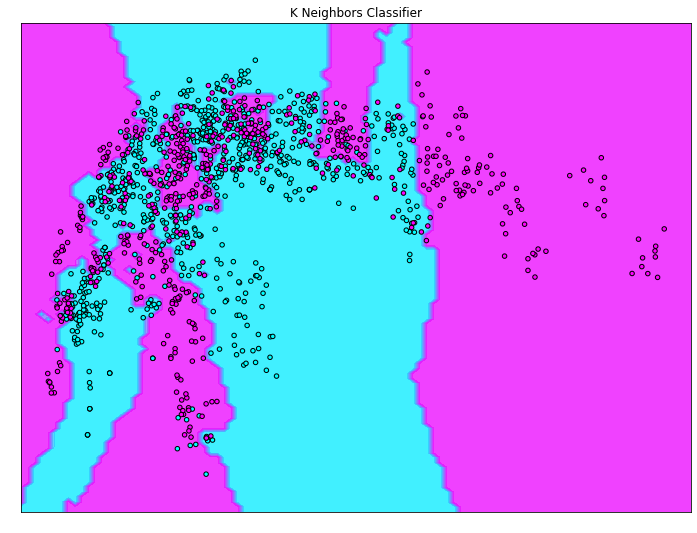

In [32]:
n_neighbors = 30
# we create an instance of KNeighborsClassifier using distance standard Euclidean distance
knn=neighbors.KNeighborsClassifier(n_neighbors,weights='distance',algorithm='brute',metric='minkowski')
# data since we want to plot the support vectors
models_fit = knn.fit(X_train, y_train) 
# title for the plots
title = ("K Neighbors Classifier")
#Classifier score
print("Training Accuracy : ",accuracy_score(y_train, models_fit.predict(X_train)))
print("Testing Accuracy : ",accuracy_score(y_test, models_fit.predict(X_test)))

# Set-upgrid for plotting.
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
X0, X1 = X[:, 0], X[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(knn,X,response_method="predict",cmap=plt.cm.cool,
        alpha=0.8,
        ax=ax,
        xlabel=" ",
        ylabel=" ",
)

ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

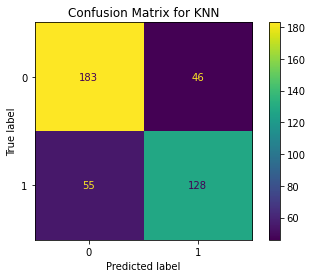

In [24]:
cm = confusion_matrix(y_test, models_fit.predict(X_test), labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.title("Confusion Matrix for KNN")
plt.show()